## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully.")


Libraries imported successfully.


###  Load Dataset

In [2]:
# Load the CSV file
file_path = "input_data/Diwali Sales Data.csv"  # relative path from the notebook
df = pd.read_csv(file_path, encoding='unicode_escape')

# Show first few rows
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


### View Basic Info

In [3]:
# Check structure of dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


### Check Null Values

In [4]:
# Null value check
df.isnull().sum()


User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

### Drop Unnecessary Columns & Nulls

In [5]:
# Drop columns that are not needed
df.drop(['Status', 'unnamed1'], axis=1, inplace=True, errors='ignore')

# Drop rows with null values
df.dropna(inplace=True)

# Reset index after drop
df.reset_index(drop=True, inplace=True)

print("Cleaned dataset:")
df.head()


Cleaned dataset:


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [6]:
# Convert Amount to int
df['Amount'] = df['Amount'].astype(int)

# Rename columns for simplicity
df.rename(columns={
    'Marital_Status': 'Married',
    'Product_Category': 'Category'
}, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11239 entries, 0 to 11238
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User_ID     11239 non-null  int64 
 1   Cust_name   11239 non-null  object
 2   Product_ID  11239 non-null  object
 3   Gender      11239 non-null  object
 4   Age Group   11239 non-null  object
 5   Age         11239 non-null  int64 
 6   Married     11239 non-null  int64 
 7   State       11239 non-null  object
 8   Zone        11239 non-null  object
 9   Occupation  11239 non-null  object
 10  Category    11239 non-null  object
 11  Orders      11239 non-null  int64 
 12  Amount      11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.1+ MB


### Gender-wise Purchase Analysis

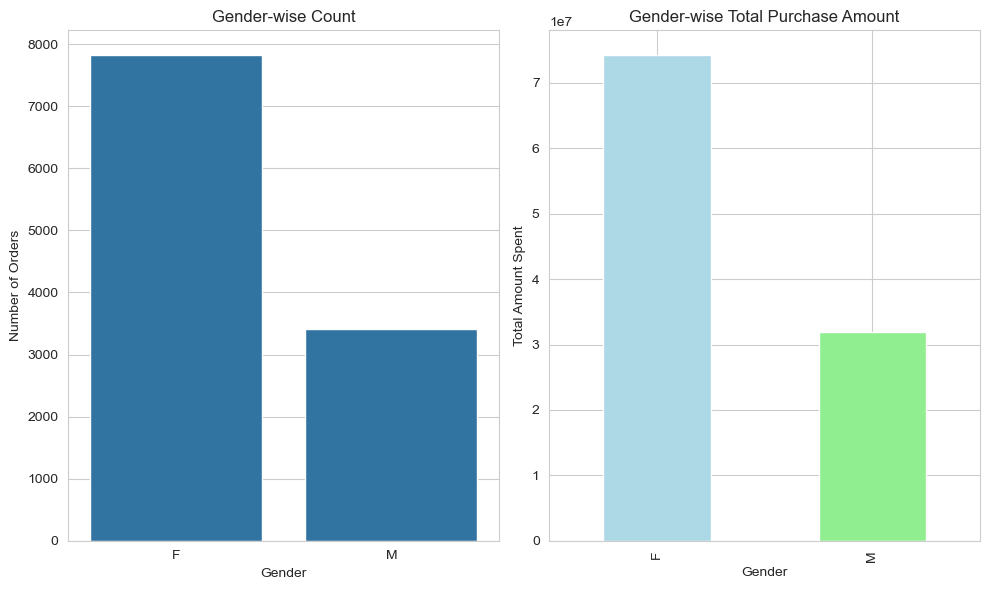

In [9]:
# Count of purchases by gender
gender_count = df['Gender'].value_counts()

# Total amount spent by each gender
gender_amount = df.groupby('Gender')['Amount'].sum()

# Plotting side by side
plt.subplot(1, 2, 1)
sns.countplot(x='Gender', data=df)
plt.title('Gender-wise Count')
plt.xlabel('Gender')
plt.ylabel('Number of Orders')

plt.subplot(1, 2, 2)
gender_amount.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Gender-wise Total Purchase Amount')
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')

plt.tight_layout()
plt.show()


### Age Group Spending Analysis

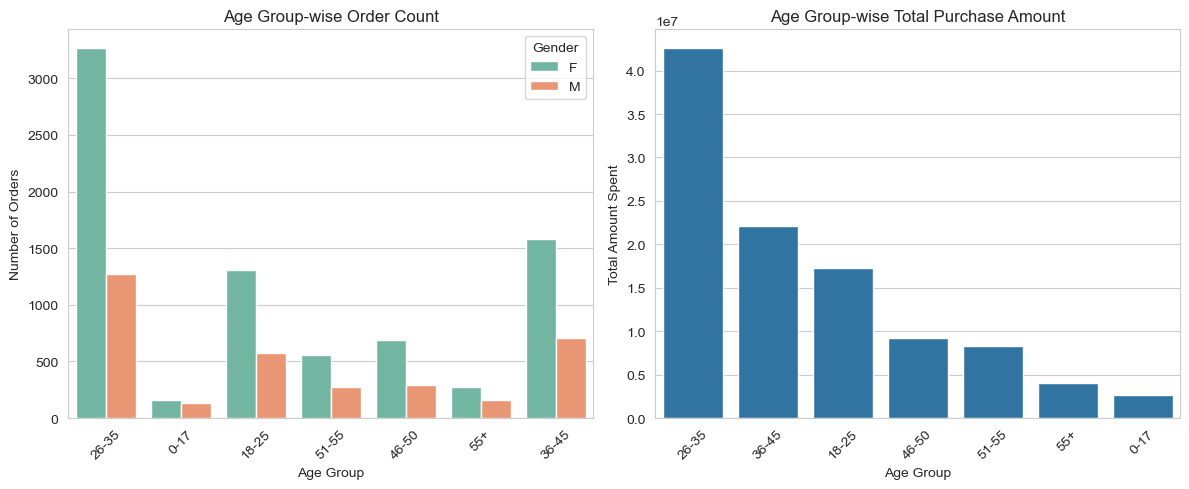

In [13]:
# Set compact figure size
plt.figure(figsize=(12, 5))

# 1. Age group order count with gender
plt.subplot(1, 2, 1)
sns.countplot(x='Age Group', data=df, hue='Gender', palette='Set2')
plt.title('Age Group-wise Order Count')
plt.xlabel('Age Group')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)

# 2. Age group total amount spent
plt.subplot(1, 2, 2)
age_amount = df.groupby('Age Group')['Amount'].sum().sort_values(ascending=False)
sns.barplot(x=age_amount.index, y=age_amount.values)  # <- removed palette here
plt.title('Age Group-wise Total Purchase Amount')
plt.xlabel('Age Group')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Top 10 States by Purchase Amount

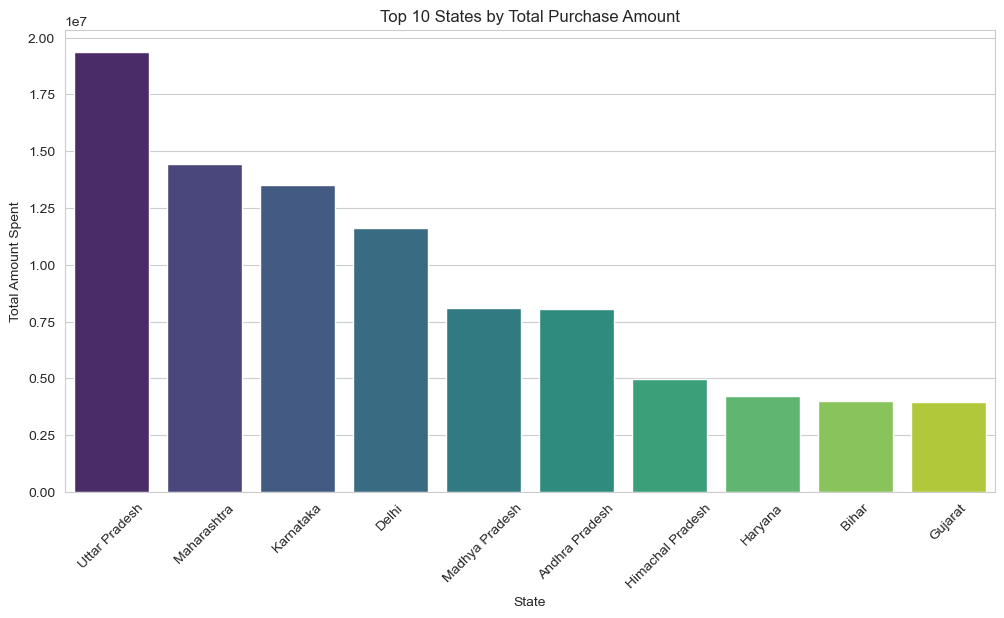

In [16]:
# Set figure size
plt.figure(figsize=(12, 6))

# Prepare DataFrame for Seaborn compatibility
state_amount_df = state_amount.reset_index()
state_amount_df.columns = ['State', 'Total']

# Plotting with colorful palette and hue workaround
sns.barplot(data=state_amount_df, x='State', y='Total', hue='State', palette='viridis', dodge=False)
plt.legend([],[], frameon=False)  # Hide legend
plt.title('Top 10 States by Total Purchase Amount')
plt.xlabel('State')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()


### Occupation-wise Purchase Behavior

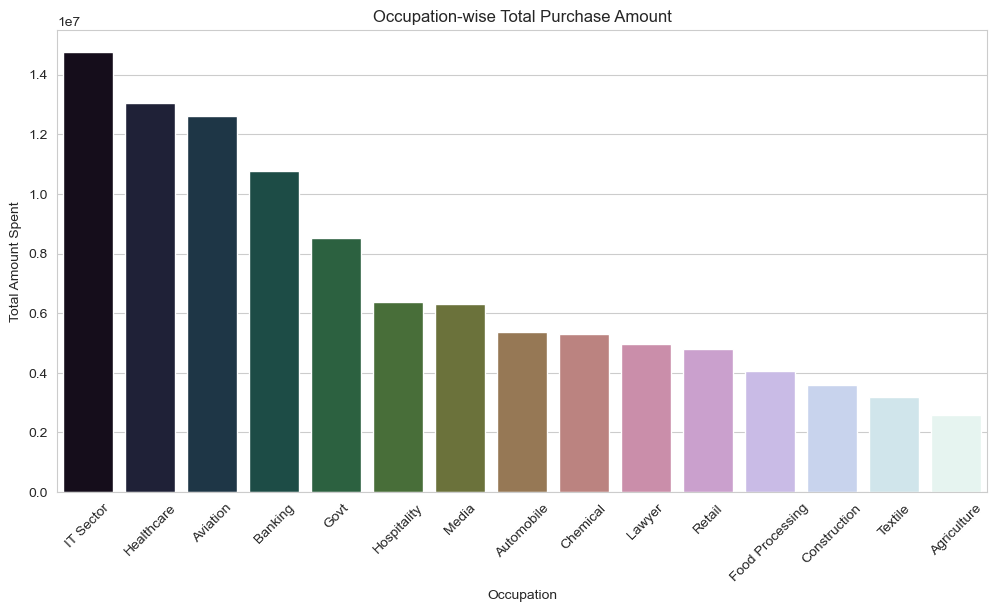

In [17]:
# Set figure size
plt.figure(figsize=(12, 6))

# Group by Occupation and sort by total Amount
occupation_amount = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)

# Convert to DataFrame for hue workaround
occupation_df = occupation_amount.reset_index()
occupation_df.columns = ['Occupation', 'Total']

# Plot
sns.barplot(data=occupation_df, x='Occupation', y='Total', hue='Occupation', palette='cubehelix', dodge=False)
plt.legend([],[], frameon=False)
plt.title('Occupation-wise Total Purchase Amount')
plt.xlabel('Occupation')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.show()


### Marital Status-wise Purchase Behavior

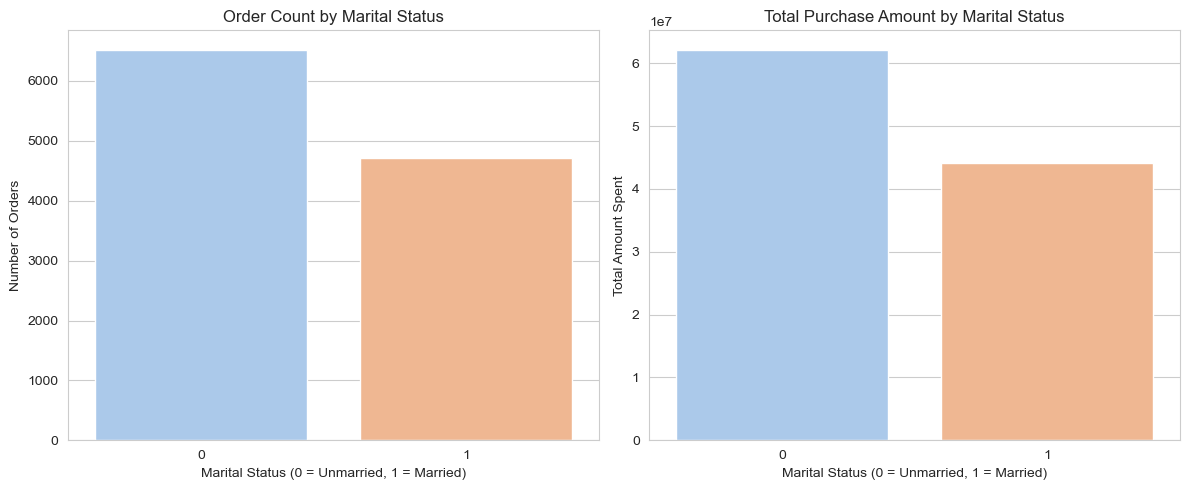

In [19]:
# Set figure size
plt.figure(figsize=(12, 5))

# 1. Count of orders by marital status (with hue workaround)
plt.subplot(1, 2, 1)
married_count_df = df['Married'].value_counts().reset_index()
married_count_df.columns = ['Married', 'Count']
sns.barplot(data=married_count_df, x='Married', y='Count', hue='Married', palette='pastel', dodge=False)
plt.legend([], [], frameon=False)
plt.title('Order Count by Marital Status')
plt.xlabel('Marital Status (0 = Unmarried, 1 = Married)')
plt.ylabel('Number of Orders')

# 2. Total amount spent by marital status
plt.subplot(1, 2, 2)
married_amount = df.groupby('Married')['Amount'].sum().reset_index()
married_amount.columns = ['Married', 'Total']
sns.barplot(data=married_amount, x='Married', y='Total', hue='Married', palette='pastel', dodge=False)
plt.legend([], [], frameon=False)
plt.title('Total Purchase Amount by Marital Status')
plt.xlabel('Marital Status (0 = Unmarried, 1 = Married)')
plt.ylabel('Total Amount Spent')

plt.tight_layout()
plt.show()


### Top Categories by Total Purchase Amount

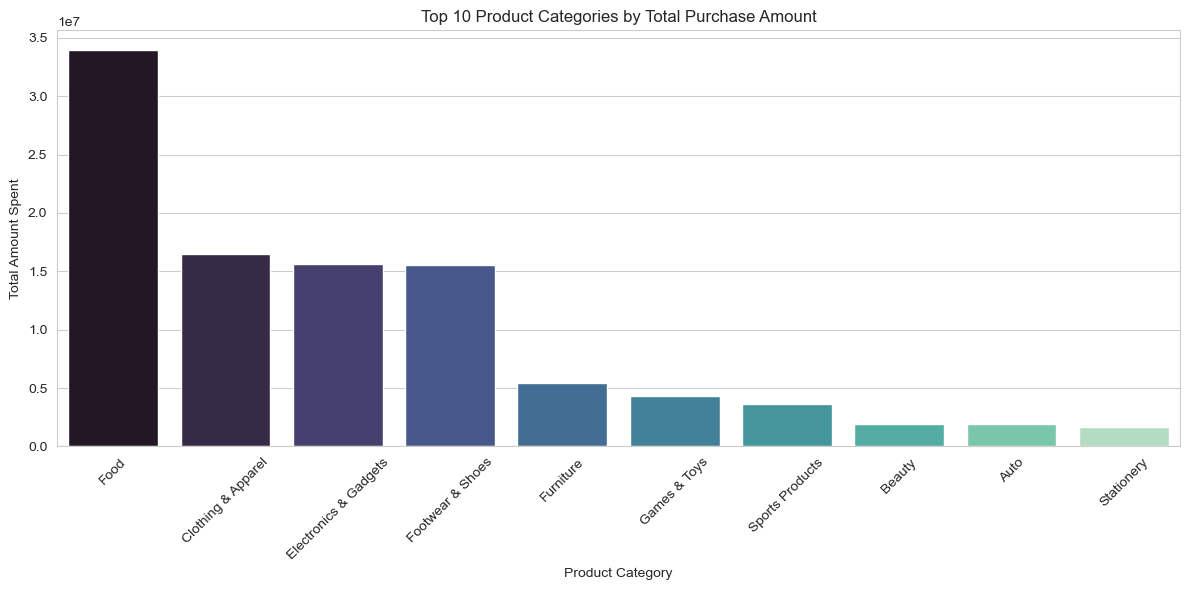

In [20]:
# Set figure size
plt.figure(figsize=(12, 6))

# Group by Category and sort by total amount
category_amount = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame for plotting
category_df = category_amount.reset_index()
category_df.columns = ['Category', 'Total']

# Plot using Seaborn with hue to avoid warning
sns.barplot(data=category_df, x='Category', y='Total', hue='Category', palette='mako', dodge=False)
plt.legend([], [], frameon=False)
plt.title('Top 10 Product Categories by Total Purchase Amount')
plt.xlabel('Product Category')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Top Products by Revenue

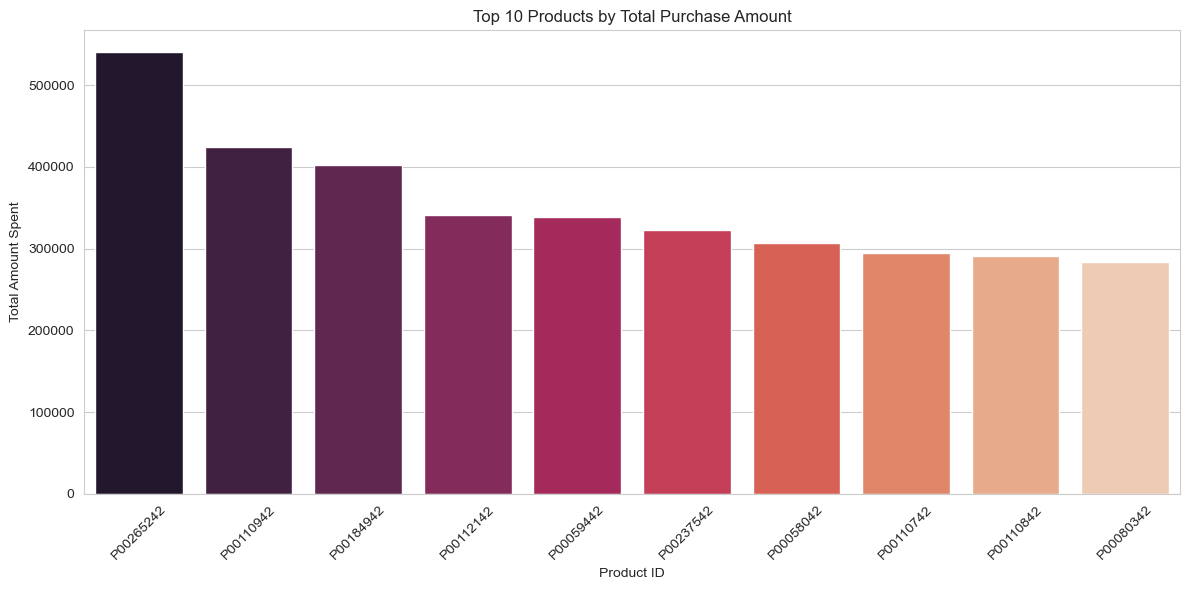

In [22]:
# Set figure size
plt.figure(figsize=(12, 6))

# Group by Product_ID and sort
product_amount = df.groupby('Product_ID')['Amount'].sum().sort_values(ascending=False).head(10)

# Convert to DataFrame
product_df = product_amount.reset_index()
product_df.columns = ['Product_ID', 'Total']

# Plot with hue workaround
sns.barplot(data=product_df, x='Product_ID', y='Total', hue='Product_ID', palette='rocket', dodge=False)
plt.legend([], [], frameon=False)
plt.title('Top 10 Products by Total Purchase Amount')
plt.xlabel('Product ID')
plt.ylabel('Total Amount Spent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 📌 Conclusion

According to our Diwali Sales Analysis:

*Married women aged 26–35 years, especially from Uttar Pradesh, Maharashtra, and Karnataka, working in IT, Healthcare, and Aviation, are the most likely to shop during Diwali.*

They tend to purchase more from the Food, Clothing, and Electronics categories.

🎯 These findings can help businesses:
- Tailor festive offers to high-spending segments
- Prioritize inventory for best-selling categories
- Enhance the customer experience through targeted marketing
